In [1]:
import numpy as np
import main_functions as mf
import sys
np.set_printoptions(threshold=sys.maxsize)
import plotly.express as px
import plotly.graph_objects as go
from controlsignalpath import ControlSignalPath
from models import ControlModel
import controlsignalpath
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Synthetic Data

We will generate dynamics with a single A (latent state) and a single control input.

In [2]:
dyns = mf.create_slds(K=1, D_obs=4, D_control=1, fix_point_change=False)
X = dyns.generate(T=1000, fix_point_change=False, add_noise=True).squeeze()
X1 = X[:,:-1]
X2 = X[:,1:]

In [3]:
px.line(X.T, title='True Data').update_layout(xaxis_title='time', yaxis_title='input', legend_title='control signal', showlegend=False).show()

In [4]:
controls = dyns.u_.T
px.line(controls, title='True Control Signal').update_layout(xaxis_title='time', yaxis_title='input', legend_title='control signal', showlegend=False)

## Initialization

In [5]:
num_iter = 100 # number of iterations of the algorithm
D_obs, T = X1.shape # dimension of the observation space x time points
D_control = 1 # dimension of the control space
control_density = 0.1 # density of control inputs

## Model Fitting

In [6]:
CM = ControlModel(control_density)
CM.fit(X1, X2, num_iter, D_control=1)

Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
No values above threshold 2.8405012759717514 in control input 0


In [7]:
px.line(CM.all_U[0].T, title='Control Signal Initialization').update_layout(xaxis_title='time', yaxis_title='input', legend_title='control signal', showlegend=False).show()

In [8]:
idx=44
px.line(CM.all_U[:idx+1].squeeze().T, title=f'all Control Signals up to {idx}').update_layout(xaxis_title='time', yaxis_title='input', legend_title='U').show()

# Calculate the best control signal

In [9]:
control_signal = controlsignalpath.ControlSignalPath(X, CM.all_A, CM.all_B, CM.all_U, num_iter)

In [10]:
control_signal.calc_best_control_signal(window=2)
best_U = control_signal.U

In [11]:
px.line(control_signal.errors, color_discrete_map= {0: 'red', 1: 'blue'}).update_layout(xaxis_title='iteration', yaxis_title=f'RMSE (window={control_signal.window})', title='Errors').show()

In [12]:
px.line(control_signal.scores, title='AIC Scores for all iterations').update_layout(xaxis_title='iteration', yaxis_title=f'AIC (window={control_signal.window})', showlegend=False).show()

In [13]:
fig = go.Figure(data = [
    go.Scatter(x=np.arange(T), y=best_U.squeeze(), mode='lines', name='Best U'),
    go.Scatter(x=np.arange(T), y=controls.squeeze(), mode='lines', name='Ground Truth')
],
    layout = {"xaxis": {"title": "time"}, "yaxis": {"title": "input"}, "title": "Best Control Signal vs Ground Truth"})
fig.show()

In [14]:
idx = 31
px.line(CM.all_U[idx].squeeze().T, title=f'Control Signal after {idx} iterations').update_layout(xaxis_title='time', yaxis_title='input', legend_title='U').show()

## Visualize

In [15]:
X3 = np.zeros((T, D_obs, 1))
initial_conditions = np.random.randn(CM.all_A[0].shape[0])
X3[0] = np.array(initial_conditions).reshape(-1, 1)
for i in range(1, T-1):
            X3[i] = CM.all_A[np.argmax(control_signal.scores)] @ X3[i-1] + \
                CM.all_B[np.argmax(control_signal.scores)] @ best_U[:, i-1].reshape(-1, 1)

In [16]:
dynamics = np.vstack([X3[:, k, 0].flatten() for k in range(D_obs)])
fig = px.line(dynamics.T, title='Reconstructed SLDS with controls', labels={'index': 'time', 'value': 'state (e.g. F)'})
fig.show()

## DLDS on same synthetic data

In [17]:
dlds_model = mf.train_model_include_D(data=X, max_iter=1000)

c:\Users\LAK\miniforge\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

c:\Users\LAK\miniforge\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



Error = 0.11973192591133593
Error = 0.01461165096691245
Error = 0.012678475959074665
Error = 0.04604538222610277
Error = 0.4235095394529924
Error = 0.03382389105380434
Error = 0.013847184459489669
Error = 0.01038090500365104
Error = 0.007458057779038746
Error = 0.00658655094686544
Error = 0.006148666632960325
Error = 0.005857467788437694
Error = 0.005580667352429467
Error = 0.005468270919958578
Error = 0.005467182684164387
Error = 0.005398136483326778
Error = 0.005363213359966222
Error = 0.005354409781420163
Error = 0.005509064507306528
Error = 0.0056599493637343335
Error = 0.005409294017844893
Error = 0.005400713453883184
Error = 0.005342724382242111
Error = 0.005315859138823089
Error = 0.005299423651598232
Error = 0.005291167244198469
Error = 0.0052848667574258955
mixed F
Error = 0.005277550506158136
Error = 0.01984866268724501
Error = 0.005735134850610431
Error = 0.005733121696203463
Error = 0.005731413711997982
Error = 0.0057299406358245104
mixed F
Error = 0.005728705375511031
Erro

In [18]:
recon = mf.create_reco(X, dlds_model[0], dlds_model[1])

In [19]:
px.line(recon.T, title='Reconstructed SLDS without controls (dLDS)').update_layout(xaxis_title='time', yaxis_title='input', legend_title='control signal', showlegend=False).show()

In [20]:
px.line(X.T, title='True Data').update_layout(xaxis_title='time', yaxis_title='input', legend_title='control signal', showlegend=False).show()

In [31]:
mock_X = np.zeros(X.shape)
mock_X[:,0] = np.array(initial_conditions)

recon, eigvals = mf.create_reco2(X, dlds_model[0], dlds_model[1])

[0.29156222 0.48852128 1.14091009 0.98484689]
[0.1262256  0.38724847 0.22659483 0.89230737]
[-0.06777274  0.18096745 -0.02391347  0.15475984]
[ 0.22590783  0.14830206 -0.03619958 -0.14347415]
[ 0.29070301 -0.13554859 -0.21102139 -0.05782222]
[ 0.12483661 -0.62949274  0.04824345  0.08512276]
[-0.46754311 -1.05750578  0.3153316  -0.34690892]
[ 0.06407673 -0.36440152  0.1453366  -0.26611652]
[ 0.0692842  -0.47391383  0.05570671 -0.38133753]
[ 0.27065922 -0.44869984  0.01501601 -0.45485026]
[ 0.1894733  -0.3521548  -0.09345559 -0.71669342]
[ 0.66601378 -0.61332897 -0.28121992 -1.14343169]
[ 1.09395592  0.01300804 -0.73331103 -3.22322867]
[ 0.82892246 -1.49518323 -1.31561337 -1.39999013]
[-0.50251483 -1.97230725 -0.68378629  1.00111541]
[-5.02724025 -2.30747375  0.41919799  0.17892258]
[ 0.32610721  6.53446449  0.77268427 -0.76535269]
[6.66815357 2.56796064 1.94278967 2.3472838 ]
[ 0.46931686 -0.03963953  0.31032798 -0.77012283]
[ 0.00070529  0.05544318 -0.0532056  -0.12816306]
[-0.44639841

In [99]:
px.line(recon[:,:1000].T, title='Reconstructed SLDS without controls (dLDS)').update_layout(xaxis_title='time', yaxis_title='input', legend_title='control signal', showlegend=False).show()

In [115]:
px.line(dlds_model[0].T, title='coefficients').update_layout(xaxis_title='time', yaxis_title='magnitude', legend_title='mode').show()

[0.85676368 0.85676368 0.39680206 1.        ]
[0.74325293 1.         0.61166841 0.61166841]
[0.80336891 1.         0.49758386 0.49758386]


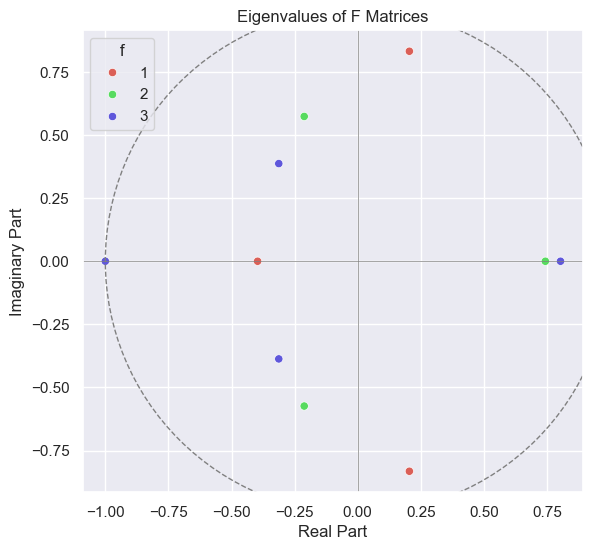

In [111]:
sns.set_theme()

plt.figure(figsize=(10, 6))

colors = {'1': 'red', '2': 'blue', '3': 'green', '4': 'purple'}  

data = []

for idx, f_i in enumerate(dlds_model[1]):
    eigenvalues, eigenvectors = linalg.eig(f_i)
    print(np.abs(eigenvalues))
    for eval_num, eigenval in enumerate(eigenvalues):
        data.append({'real': np.real(eigenval), 'imag': np.imag(eigenval), 'f': f'{idx+1}'})        
df = pd.DataFrame(data)

sns.scatterplot(data=df, x='real', y='imag', hue='f', alpha=1, palette=
                sns.color_palette("hls", len(dlds_model[1])))     
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues of F Matrices')

# Add a unit circle
unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(unit_circle)

# Set equal scaling to ensure the unit circle is round
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()
